# Analyse du facteur de charge éolien à Toulouse entre 1980 et 2022

### Chargement des packages et choix des options

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [2]:
#Choix des options

#Lien pour les données
#data_path=""
data_path="../Données/"

## Mise en forme des données

On a des téléchargé les données de facteur de charge à Toulouse pour un certain modèle d'éolienne (voir Info_données dans le dossier data/Toulouse/Wind_power_default) sous forme de 43 fichiers CSV (1 par an). L'idée est de combiner toute es données pour obtenir un fichier csv avec les données horaires et un fichier avec les données journalières pour la suite de l'étude.
On fait le choix de créer se programme en dehors dans le fichier 'utility_tools' pour pouvoir le réutiliser par la suite.

In [21]:
from utility_tools import regroupement_data

data_hour_wind,data_day_wind=regroupement_data(data_path+'Data_Toulouse/Wind_power_default/',1980,2022)

print(data_hour_wind.head(),data_hour_wind.tail(),data_day_wind.head(),data_day_wind.tail())
#print(data_day_wind.dtypes)

Toutes les données sont différentes
                 time        local_time  electricity  wind_speed
0 1980-01-01 00:00:00  1980-01-01 01:00        0.132       5.062
1 1980-01-01 01:00:00  1980-01-01 02:00        0.108       4.756
2 1980-01-01 02:00:00  1980-01-01 03:00        0.107       4.753
3 1980-01-01 03:00:00  1980-01-01 04:00        0.086       4.448
4 1980-01-01 04:00:00  1980-01-01 05:00        0.085       4.439                     time        local_time  electricity  wind_speed
8755 2022-12-31 19:00:00  2022-12-31 20:00        0.429       7.650
8756 2022-12-31 20:00:00  2022-12-31 21:00        0.422       7.603
8757 2022-12-31 21:00:00  2022-12-31 22:00        0.420       7.593
8758 2022-12-31 22:00:00  2022-12-31 23:00        0.426       7.632
8759 2022-12-31 23:00:00  2023-01-01 00:00        0.423       7.613             electricity  wind_speed
time                               
1980-01-01     0.274292    6.263542
1980-01-02     0.334875    6.864042
1980-01-03     0.02370

On va maintenant afficher les données journalières et horaires

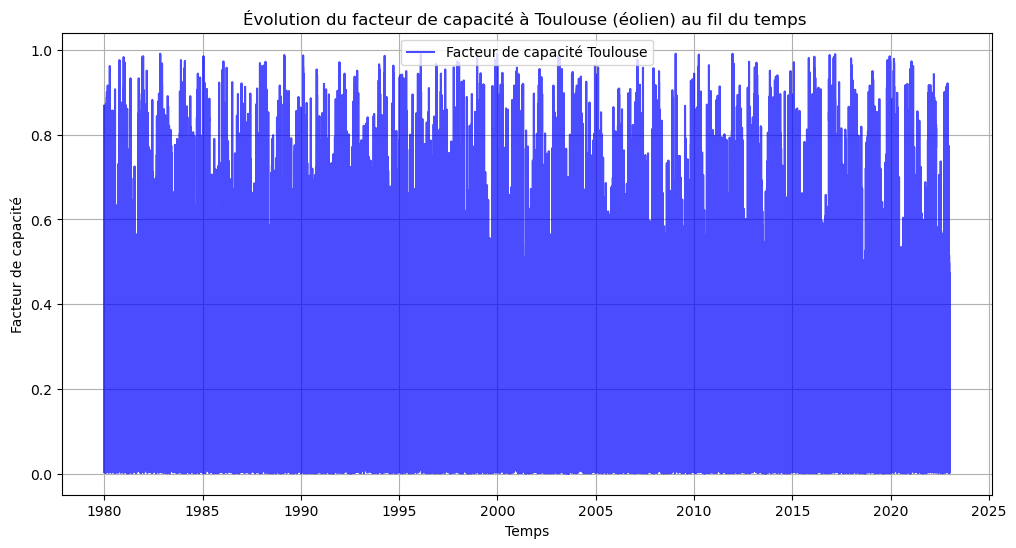

In [12]:
# Création du graphique de série temporelle pour la capacité
plt.figure(figsize=(12, 6))
plt.plot(data_hour_wind['time'], data_hour_wind['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (éolien) heure par heure ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()


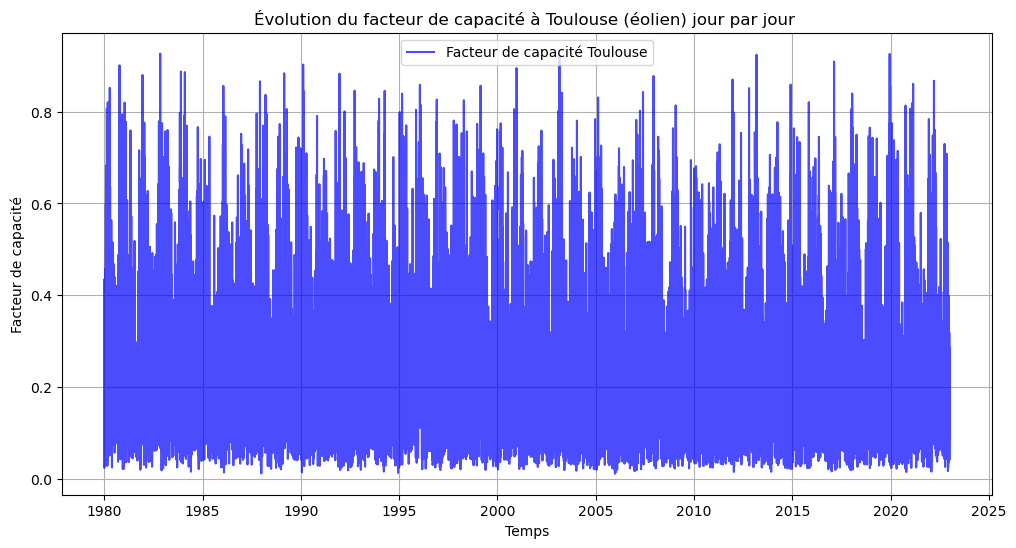

In [16]:
# Création du graphique de série temporelle pour la capacité
plt.figure(figsize=(12, 6))
plt.plot(data_day_wind.index, data_day_wind['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

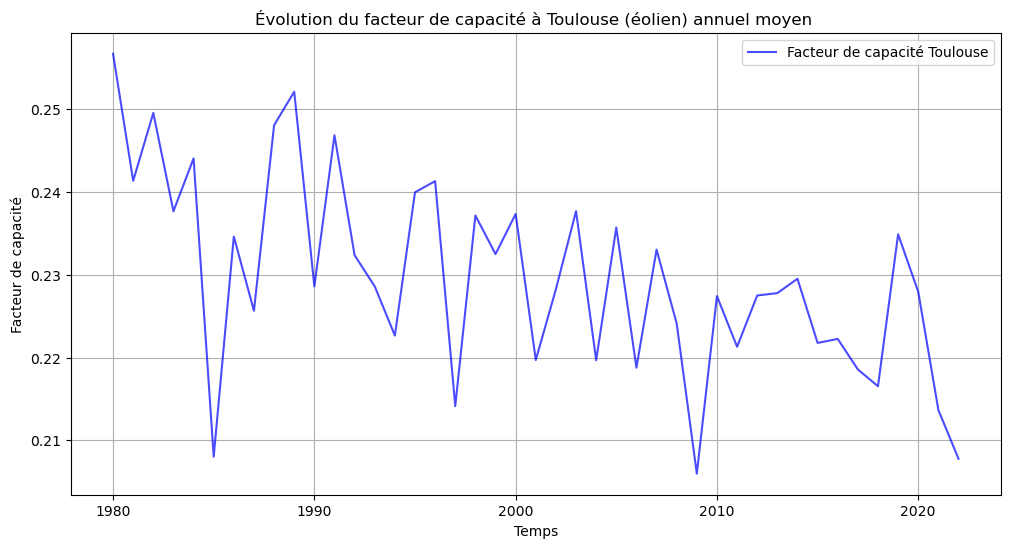

In [31]:
# On commence par regrouper les données par année

data_year_wind = data_hour_wind.groupby(data_hour_wind['time'].dt.year).agg({'electricity': 'mean', 'wind_speed': 'mean'})

# Création du graphique de série temporelle pour la capacité nationale
plt.figure(figsize=(12, 6))
plt.plot(data_year_wind.index, data_year_wind['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (éolien) annuel moyen ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

## Etude de tendance et saisonnalité

### Etude de la tendance

On va maintenant étudier la tendance de nos données.

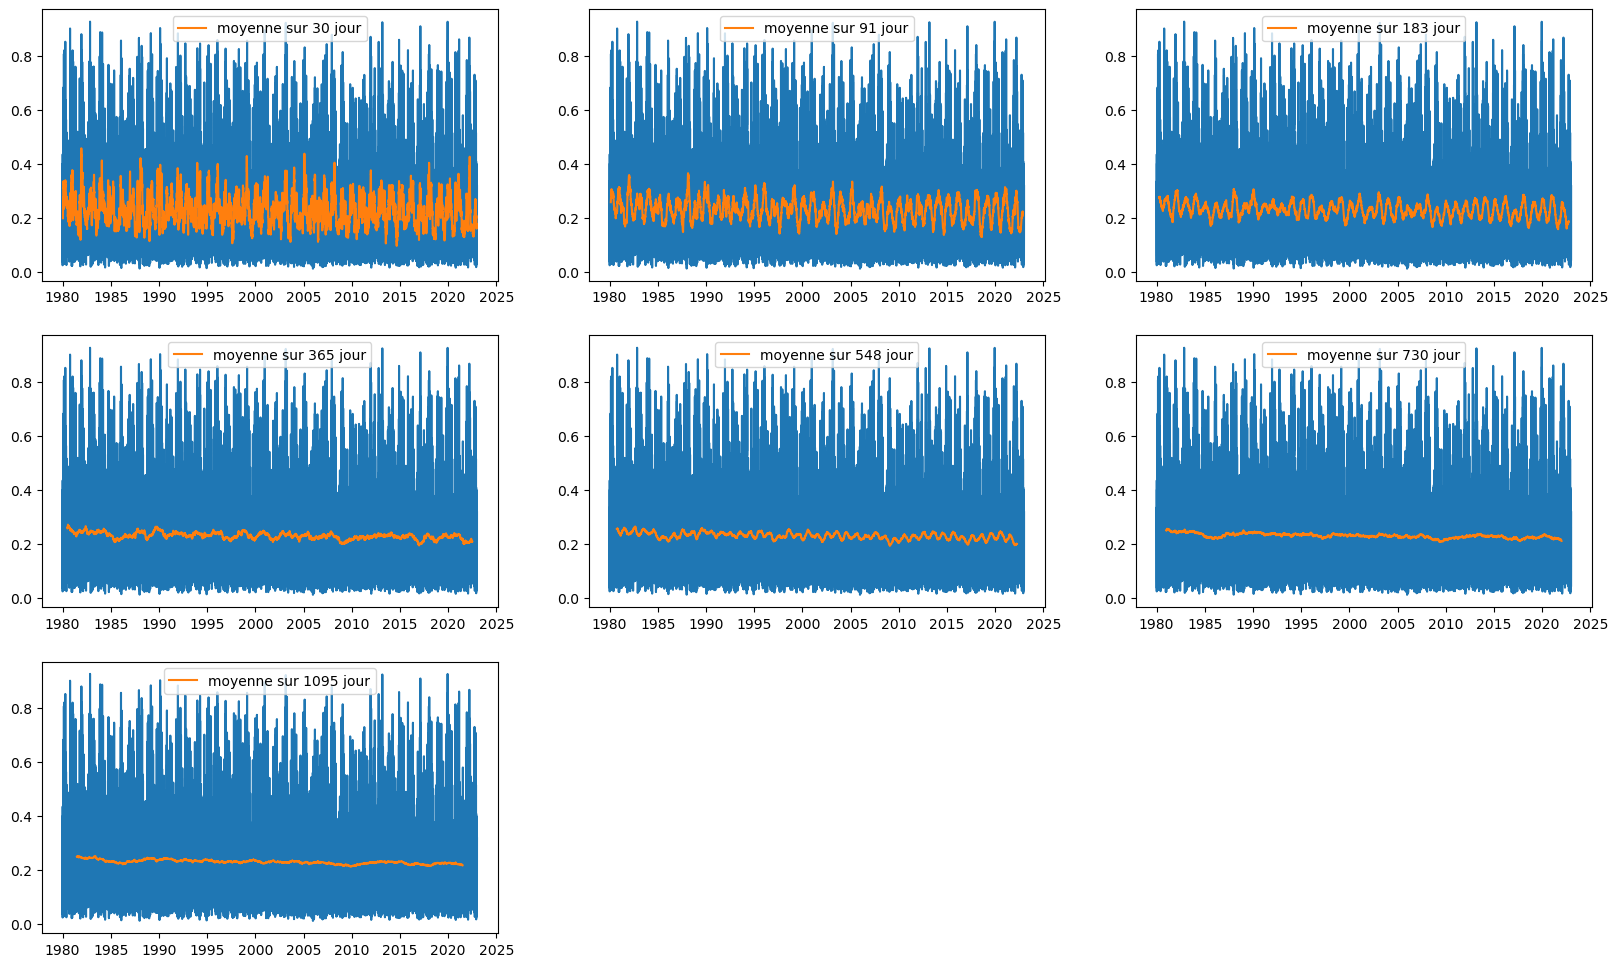

In [19]:
win = [30, 91, 183, 365, 548, 730, 1095] # fenêtre d'observation (en nombre de semaines)
fig = plt.figure(figsize=(20,12))

for i in range(len(win)):
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(data_day_wind['electricity'])
    ax.plot(data_day_wind['electricity'].rolling(win[i], center=True).mean(), label=f"moyenne sur {win[i]} jour")
    ax.legend()

On observe la tendance sur 1 mois, 3 mois, 6 mois, 1 an, 1 an et demi, 2 ans et 3 ans. On observe que quand la durée de la fenêtre augmente, la tendance approche de plus en plus d'une fonction constante : la tendance du facteur de charge éolien est donc plutôt constant. On observe également une tendance plus linéaire sur des multiples d'un an, ce qui confirme l'intuition qu'on a une saisonnalitée sur 1 an.
Cette analyse est cohérente avec nos intuitions : la tendance du vent n'évolue pas ou très peu au cours du temps.

### Etude de la saisonnalité

On va maintenant étudier la saisonnalité de nos données.

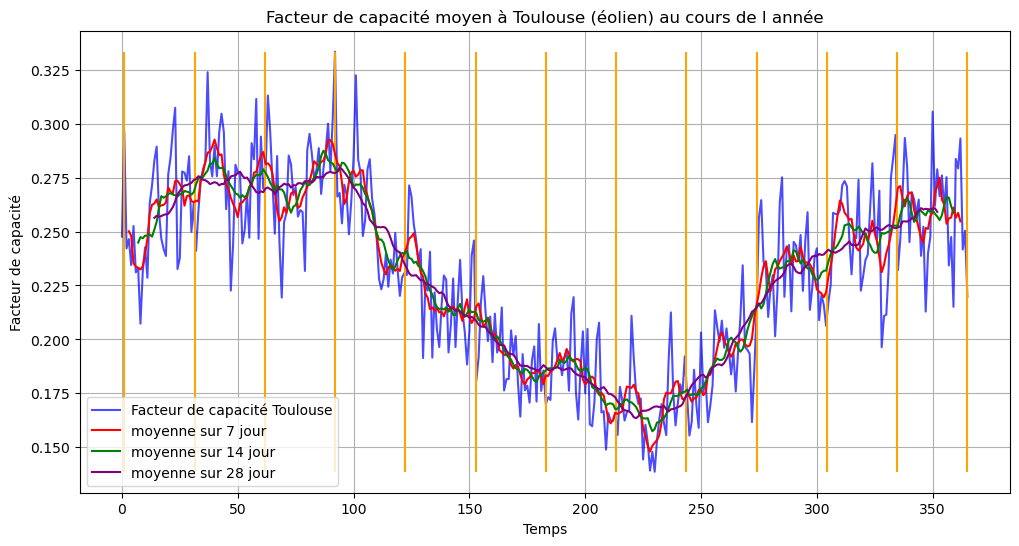

In [85]:
# On commence par regrouper les données par année
data_hour_copy=data_hour_wind.copy()
data_hour_copy['day']=data_hour_copy['time'].dt.day
data_hour_copy['month']=data_hour_copy['time'].dt.month

data_year_wind_tendance = data_hour_copy.groupby(['month', 'day']).agg({'electricity': 'mean', 'wind_speed': 'mean'})

#print(type(data_year_wind_tendance.index))



# Création du graphique de série temporelle pour la capacité nationale
plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),data_year_wind_tendance['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Facteur de capacité moyen à Toulouse (éolien) au cours de l année')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

time_tick  = np.linspace(1, 365, 13)
plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")

#On ajoute une "moyenne" en lissant
plt.plot(data_year_wind_tendance['electricity'].rolling(7, center=True).mean().to_numpy(), label=f"moyenne sur 7 jour", color = "red")
plt.plot(data_year_wind_tendance['electricity'].rolling(14, center=True).mean().to_numpy(), label=f"moyenne sur 14 jour", color = "green")
plt.plot(data_year_wind_tendance['electricity'].rolling(28, center=True).mean().to_numpy(), label=f"moyenne sur 28 jour", color = "purple")
plt.legend()

plt.show()

Interprétation : à faire

### Etude avec la fonction "decompose"

On va maintenant étudier les données avec la fonction "decompose"

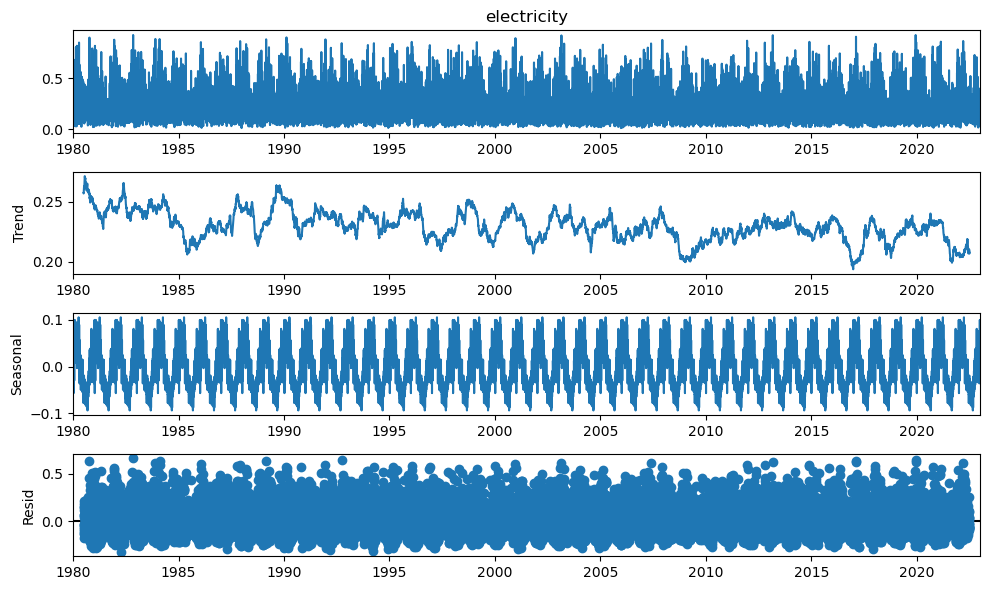

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

decomp = seasonal_decompose(data_day_wind['electricity'], model='additive',period=365)

fig = decomp.plot()
fig.set_size_inches((10, 6))
fig.tight_layout()
plt.show()